In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

# Challenge: Can we use the ingredient and keyword list to predict the rating?<br>

(For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.)

# Intro

Load data. <br>
Preview data and columns.

In [2]:
raw_data = pd.read_csv('epi_r.csv')
#print(list(raw_data.columns))
print(raw_data.shape)
print(raw_data.head())

(20052, 680)
                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

    ...    yellow squash  yogurt  yon

Looks like we have 20052 recipe entries and 680 features. Now, let's get a basic statistical and visual representation of the sample dataset.

In [3]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

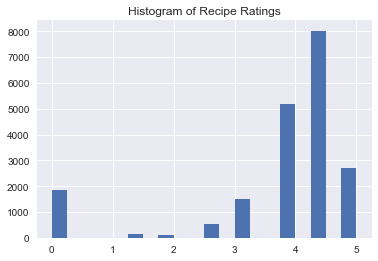

In [4]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

"There are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews. People are more likely to review recipes when they have strong feelings about them. Some bad recipes may have very few very low reviews."

Can we use nutritional information to help build our model?

In [5]:
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

Nutrition information is not available for all goods. Out of ~20000 observations, there are only about 4000 for each nutritional categories. This seriously limits the scope of our data. Drop nutritional columns, for now.

Let's train a Support Vector Regressor.

In [6]:
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Now let's see what a scatter plot looks like, comparing actuals to predicted.

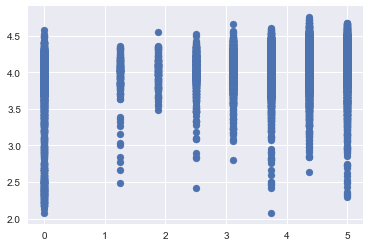

In [7]:
plt.scatter(Y, svr.predict(X))

Because of the discontinous nature of our outcome variable, there's too much data for us to really see what's going on here and we end up with nebulous spreads of predictions. The classifier does at least seem to predict the 4/5 ratings at a higher spread than the rest, which is a good sign.<br>

Now let's assess the score.

In [8]:
svr.score(X, Y)

0.038565706512988962

In [9]:
svr_cv = cross_val_score(svr, X, Y, cv=5)
print(svr_cv)
print(svr_cv.mean())

[ 0.01818511  0.026411    0.03037705  0.01957949  0.02451197]
0.0238129242667


Very poor accuracy, and slightly overfitting.

# Challenge

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features. <br>

First let's start by converting the continuous output to binary: <br>
Create a new column that applies a function to decide whether the rating is good or bad. This converts it from continuous to binary output.<br>
Define good as 4 or 5. <br>
Count how many are good/bad.

In [10]:
def good_bad (rating):
    if rating >= 4:
        return 1
    else:
        return 0

raw_data['good/bad'] = raw_data['rating'].apply(good_bad)

print(raw_data.head())
print(raw_data['good/bad'].value_counts())

                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

     ...     yogurt  yonkers  yuca  zucchini  cook

With ~10000 recipes classified as "good" and ~9000 recipes classified as "bad", we aren't dealing with significant class imbalance here. Let's try running an initial classifier.

In [11]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data['good/bad']

"""svm = SVC(kernel = 'linear')
svm.fit(X, Y)

print(svm.score(X,Y))
svm_cv = cross_val_score(svm, X, Y, cv=5)
print(svm_cv.mean())"""

"svm = SVC(kernel = 'linear')\nsvm.fit(X, Y)\n\nprint(svm.score(X,Y))\nsvm_cv = cross_val_score(svm, X, Y, cv=5)\nprint(svm_cv.mean())"

This runs extremely slow for the entire dataset, so it isn't a good idea to run it for a preliminary idea. Let's cut 681 columns down to just a few to minimize run time for abbreviated experimental processing.

In [12]:
new_columns = ['appetizer', 'apple', 'bacon', 'basil', 'parsnip', 'party', 'lemon', 'quick and healthy', 'simmer', 
    'thanksgiving', 'wine', 'leftovers', 'turkey', 'winter', 'pineapple', 'oyster', 'paleo', 'vegetarian', 'vegan',
    'good/bad']
new_data = raw_data[new_columns]
print(new_data.head())

   appetizer  apple  bacon  basil  parsnip  party  lemon  quick and healthy  \
0        0.0    1.0    0.0    0.0      0.0    0.0    0.0                0.0   
1        0.0    0.0    0.0    0.0      0.0    0.0    0.0                0.0   
2        0.0    0.0    0.0    0.0      0.0    0.0    0.0                0.0   
3        0.0    0.0    0.0    0.0      0.0    0.0    0.0                0.0   
4        0.0    0.0    0.0    0.0      0.0    0.0    0.0                0.0   

   simmer  thanksgiving  wine  leftovers  turkey  winter  pineapple  oyster  \
0     0.0           0.0   0.0        0.0     1.0     0.0        0.0     0.0   
1     0.0           0.0   0.0        0.0     0.0     1.0        0.0     0.0   
2     0.0           0.0   0.0        0.0     0.0     0.0        0.0     0.0   
3     1.0           0.0   0.0        0.0     0.0     0.0        0.0     0.0   
4     0.0           0.0   0.0        0.0     0.0     0.0        0.0     0.0   

   paleo  vegetarian  vegan  good/bad  
0    0.0  

Now, let's try and clean up the features: <br>
- Make a correlation matrix and cut out features based on how strongly they are correlated to other features. <br>
- Sort the features by how many other features they correlate strongly to. <br>
-  Cut out the top half of strongly correlated features.<br><br>

The following uses the small test dataset, then re-applies it to the full dataset.

In [13]:
corrmat = new_data.corr()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
def count_high_corr(row):
    count = 0
    for index, value in row.iteritems():
        if value > 0.01:
            count += 1
    return count

corrmat['count'] = corrmat.apply(lambda row: count_high_corr(row), axis=1)

# Apply this feature-counting function to every row in corrmat, store the feature in a new column 'count'
# Note: you can't actually produce a new column by iterating through other columns in that row
# because you're not directly accessing the row

sorted_by_count = corrmat.sort(columns = 'count')
print('Correlation Matrix sorted by count:')
print(sorted_by_count['count'])

best_features = sorted_by_count[:5].index.values.tolist()
print(best_features)

Correlation Matrix sorted by count:
quick and healthy     1
basil                 2
lemon                 2
leftovers             3
pineapple             3
apple                 5
paleo                 5
oyster                5
good/bad              6
party                 6
wine                  6
turkey                6
vegan                 7
vegetarian            8
parsnip               8
winter                8
appetizer             9
bacon                 9
simmer                9
thanksgiving         12
Name: count, dtype: int64
['quick and healthy', 'basil', 'lemon', 'leftovers', 'pineapple']


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Now that code works, repeat for full dataset.

In [14]:
corrmat = raw_data.corr()

def count_high_corr(row):
    count = 0
    for index, value in row.iteritems():
        if value > 0.01:
            count += 1
    return count

corrmat['count'] = corrmat.apply(lambda row: count_high_corr(row), axis=1)

sorted_by_count = corrmat.sort(columns = 'count')
print('Correlation Matrix sorted by count:')
print(sorted_by_count['count'])

best_features = sorted_by_count[:30].index.values.tolist()
print(best_features)  

Correlation Matrix sorted by count:
marinade               5
burrito                6
idaho                  6
fritter                6
caviar                 6
mezcal                 6
dorie greenspan        7
camping                7
beverly hills          7
mississippi            8
hummus                 8
kitchen olympics       8
frankenrecipe          8
west virginia          8
guam                   8
cuba                   9
suzanne goin           9
england                9
custard                9
crêpe                  9
egypt                  9
quiche                 9
london                 9
costa mesa             9
waffle                10
nancy silverton       10
tested & improved     10
hollywood             10
#wasteless            10
iowa                  10
                    ... 
fall                 155
breakfast            155
kid-friendly         155
tomato               155
fruit                157
kidney friendly      158
winter               159
summer        

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Now we have a list of the features with the most individual variance, but it turns out that some of them only have unique variance because they are such obscure features that are used very rarely. These likely would not have much predictive power, so let's try another method of feature reduction.<br>

Let's look at the features that have the highest correlation with the outcome, good/bad. We will use the full dataset here.

In [15]:
good_bad_corr = raw_data.corr()['good/bad']
good_bad_corr = good_bad_corr.sort_values(ascending = False)
print(good_bad_corr)

good/bad             1.000000
rating               0.655698
bon appétit          0.097076
roast                0.068198
thanksgiving         0.067094
peanut free          0.065897
soy free             0.065799
dinner               0.062186
christmas            0.054409
grill/barbecue       0.051204
tree nut free        0.047943
backyard bbq         0.047682
fall                 0.046565
grill                0.042924
stuffing/dressing    0.042454
goat cheese          0.041207
father's day         0.036564
dessert              0.036225
meat                 0.035801
fourth of july       0.033651
low carb             0.033458
turkey               0.033409
pork tenderloin      0.033370
cranberry            0.033333
sausage              0.031639
cake                 0.031405
brisket              0.031385
bake                 0.031329
red wine             0.031070
lamb                 0.030731
                       ...   
banana              -0.026496
non-alcoholic       -0.026749
zucchini  

Pick the best 30 features and use these for the SVC model.

In [16]:
best_rated_features = good_bad_corr[2:32].index.values.tolist()
print(best_rated_features)

['bon appétit', 'roast', 'thanksgiving', 'peanut free', 'soy free', 'dinner', 'christmas', 'grill/barbecue', 'tree nut free', 'backyard bbq', 'fall', 'grill', 'stuffing/dressing', 'goat cheese', "father's day", 'dessert', 'meat', 'fourth of july', 'low carb', 'turkey', 'pork tenderloin', 'cranberry', 'sausage', 'cake', 'brisket', 'bake', 'red wine', 'lamb', 'high fiber', 'pescatarian']


In [17]:
X = raw_data[best_rated_features]
Y = raw_data['good/bad']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

print(svm.score(X,Y))

0.568920805905


In [18]:
svm_cv = cross_val_score(svm, X, Y, cv=5)
print(svm_cv)
print(svm_cv.mean())

[ 0.56569434  0.56918474  0.56394914  0.5713217   0.56223497]
0.566476977893


The score is **0.569**. This is not very good, but is at least better than the regressor which was a very poor 0.285. The model is not overfitting, as evidenced by the comparable cross-validation score.

Now to see if we can get a better model by including nutrition information. <br>
Drop observations with missing data.

In [19]:
nutrition = raw_data.dropna()
nutrition_corr = nutrition.corr()[['calories', 'protein', 'fat', 'sodium', 'good/bad', 'rating']]
print(nutrition_corr)

                       calories   protein       fat    sodium  good/bad  \
rating                 0.007855  0.013971  0.007235  0.008146  0.653233   
calories               1.000000  0.742816  0.996538  0.996392  0.012569   
protein                0.742816  1.000000  0.712194  0.749287  0.015482   
fat                    0.996538  0.712194  1.000000  0.986476  0.012017   
sodium                 0.996392  0.749287  0.986476  1.000000  0.012684   
#cakeweek             -0.000210 -0.000324 -0.000215 -0.000274 -0.008299   
#wasteless            -0.000136 -0.000201 -0.000132 -0.000144  0.007243   
22-minute meals       -0.000473 -0.000466 -0.000454 -0.000446  0.019828   
3-ingredient recipes  -0.000585 -0.000758 -0.000560 -0.000597 -0.024673   
30 days of groceries  -0.000308 -0.000258 -0.000290 -0.000309  0.001083   
advance prep required -0.001083 -0.001244 -0.001033 -0.001090 -0.016538   
alabama               -0.000132 -0.000195 -0.000128 -0.000140  0.007243   
alaska                -0.

Add the nutritional features to the "best features" list (features were ranked by their correlation to the outcome.)<br>
Train the model.

In [20]:
"""X = nutrition[best_rated_features + ['calories', 'protein', 'fat', 'sodium']]
Y = nutrition['good/bad']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

print(svm.score(X,Y))
svm_cv = cross_val_score(svm, X, Y, cv=5)
print(svm_cv.mean())"""

"X = nutrition[best_rated_features + ['calories', 'protein', 'fat', 'sodium']]\nY = nutrition['good/bad']\nsvm = SVC(kernel = 'linear')\nsvm.fit(X, Y)\n\nprint(svm.score(X,Y))\nsvm_cv = cross_val_score(svm, X, Y, cv=5)\nprint(svm_cv.mean())"

Model is too computationally expensive to train with SVC. LinearSVC tends to be faster to converge the larger the number of samples is, so we will try LinearSVC. Alternatively, if this still doesn't converge, we could try training with less data.

In [26]:
X = nutrition[best_rated_features + ['calories', 'protein', 'fat', 'sodium']]
Y = nutrition['good/bad']
c_values = [0.0001, 0.001, 0.1, 1, 10]
for c in c_values:
    svm = LinearSVC(C = c, random_state=1)
    svm.fit(X, Y)
    print(f'\nC: {c}')
    print(svm.score(X,Y))


C: 0.0001
0.569402420575

C: 0.001
0.571482602118

C: 0.1
0.560199193142

C: 1
0.455937972769

C: 10
0.547844175492


When C = 0.001, the model performs the best. However, an accuracy score of **0.57** is not particularly good, and varying the C parameter does not have a huge impact on the score. Adding in the nutrition features did not significantly improve the score from before, which was also about 0.57. <br>

Let's try one more method of feature selection, SelectKBest.

In [39]:
from sklearn.feature_selection import SelectKBest

X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', 'good/bad'], 1)
Y = raw_data['good/bad']

X_k30 = SelectKBest(k=30).fit_transform(X,Y)

for c in c_values:
    svm = LinearSVC(C = c, random_state=1)
    svm.fit(X_k30, Y)
    print(f'\nC: {c}')
    print(svm.score(X_k30,Y))


C: 0.0001
0.568621583882

C: 0.001
0.578944743666

C: 0.1
0.586824256932

C: 1
0.586874127269

C: 10
0.586874127269


By using LinearSVC with the 30 best features as determined by SelectKBest, we see a very minor improvement in the score from 0.571 to **0.587.** SelectKBest is a powerful tool that uses the F statistic to eliminate less impactful features. In this case, using SelectKBest over manually picking features that correlated highly with the outcome resulted in a very small increase in performance. <br>

In the future, I would try including more features with the SelectKBest method of feature reduction, and running the model on a machine that can handle the full SVC object and not just the LinearSVC modification. Even still, it is possible that the buzzwords in a recipe title may not have predictive power for the recipe rating. Two recipes could both use "tomato", but one could be horrible and one could be great. It also depends on the proficiency of the reader in following recipes, which is another confounding factor that is not accounted for in these features.